#**Exercício - Aula 2**

## Dado o dataset de produtos [1], você deverá desenvolver diferentes modelos para classificação de textos, envolvendo cenários diferentes. O dataset utilizado será o de classificação de produtos, utilizado na aula anterior.

[1] - https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv

Obs.: em todos os modelos use:
- Remoção dos registros com valores faltantes
- criem uma nova coluna concatenando as colunas nome e descrição.
- randon_state igual a 42 para permitir a comparação com seus colegas e separe uma amostra de 30% para teste.
- Nas partes 1 e 2, utilize sempre o mesmo algorítmo de classificação.
- Para avaliação de resultados, sempre apresente o relatório de classificação e a matriz de confusão


### Parte 1 - Diferentes tipos de vetorização com um mínimo de normalização

Nesta parte você deverá aplicar apenas as seguintes técnicas de normalização:

1. Tokenização
2. Remoção de pontuação
3. Lowercasing

A partir daí, crie 3 datasets: BOW, TF e TF-IDF e treine um modelo de classificação para cada caso.

Avalie os resultados comparando a performance de cada modelo e apresente suas conclusões

### Parte 2 - Diferentes tipos de vetorização com um processo completo de normalização

Nesta parte você deverá aplicar todas as técnicas de normalização vistas em sala:

1. Tokenização
2. Remoção de pontuação
3. Lowercasing
4. Remoção de stop-words
5. Lematização/Stemmização

A partir daí, crie 3 datasets: BOW, TF e TF-IDF e treine um modelo de classificação para cada caso.

Avalie os resultados comparando a performance de cada modelo e apresente suas conclusões. Em suas análises, consifere também os resultados obtidos na parte 1

### Parte 3 (Extra) - Diferentes algorítmos de classificação

Nesta parte você deverá selecionar um dos datasets criados na parte 2 (justifique) e treinar 3 modelos de classificação utilizando diferentes algorítmos. Seguem algumas sugestões de algorítimos:

- Regressão Logistica (LogisticRegression)
- Random Forest (RandomForestClassifier)
- Naive Bayes (MultinomialNB e BernoulliNB)


Avalie os resultados comparando a performance de cada modelo e apresente suas conclusões.




**Import**

Dataset e preparo das funções e prints
1. Tokenização
2. Remoção de pontuação
3. Lowercasing
4. Remoção de stop-words
5. Lematização/Stemmização

In [ ]:
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.stem.rslp import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('rslp')
rslp = RSLPStemmer()

nltk.download('punkt')
nltk.download('stopwords')

# lista de stopwords do NLTK
stopwords = nltk.corpus.stopwords.words('portuguese')

# lista de stopwords customizada
stopwords_new = [x for x in stopwords if x not in ('muito','não')]
stopwords_new = stopwords_new + ["mba", "fiap"]


# carregar dataframe
df = pd.read_csv(
    "https://dados-ml-pln.s3-sa-east-1.amazonaws.com/produtos.csv", delimiter=";", encoding='utf-8'
  )

# função que remove pontuação
def remove_punctuation(text):
    punctuations = string.punctuation
    table = str.maketrans({key: " " for key in punctuations})
    text = text.translate(table)
    return text

# função que normaliza o texto e remove stopwords
def Norma_parte1(text):
    text = text.lower()
    text = remove_punctuation(text)
    text = "".join([w for w in text if not w.isdigit()])
    text = word_tokenize(text)
    return ' '.join(text)

def Norma_parte2(text):
    text = text.lower()
    text = remove_punctuation(text)
    text = "".join([w for w in text if not w.isdigit()])
    text = word_tokenize(text)
    text = [x for x in text if x not in stopwords_new]
    text = [y for y in text if len(y) > 2]
    return " ".join([t for t in text])
    text = Stem(text)
    return text


def Stem(line):
   return ' '.join([rslp.stem(token) for token in line])


def Dar_prints(y_test,Yprevisto):
  print(classification_report(y_test, Yprevisto))
  print(accuracy_score(y_test, Yprevisto))
  cm = confusion_matrix( y_test, Yprevisto)
  disp = ConfusionMatrixDisplay(cm)
  disp.plot()

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


**Modelo utilizado foi o decison tree classifier**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
import pandas as pd


def model(x_train, y_train, x_test, y_test):

  # treinamento do modelo ávore de decisão com o dataframe de treino
  model = DecisionTreeClassifier(random_state=42)
  model.fit(x_train, y_train)

  # escoragem da classificação na amostra de teste
  y_pred = model.predict(x_test)

  return y_pred


**Parte 1  - BOW**

In [ ]:
#Avaliação do modelo

# limpeza inicial (normalização)
df.dropna(inplace=True)

df["text"] = df['nome'] + " " + df['descricao']
df['texto'] = df.text.apply(Norma_parte1)
# divisão da amostra entre treino e teste
df_train_M1, df_test_M1 = train_test_split(
      df,
      test_size = 0.3,
      random_state = 42
  )

#Utilizando contagens de termos (BOW)
vect = CountVectorizer(ngram_range=(1,1))
vect.fit(df_train_M1.texto)

x_train_M1_BOW = vect.transform(df_train_M1.texto)
y_train_M1 = df_train_M1["categoria"]
y_test_M1 = df_test_M1["categoria"]

    # transforma o dataframe de teste em vetor (features)
x_test_M1_BOW = vect.transform(df_test_M1.texto)
Yprevisto_M1_BOW = model(x_train_M1_BOW, y_train_M1, x_test_M1_BOW, y_test_M1)



              precision    recall  f1-score   support

   brinquedo       0.90      0.89      0.90       190
        game       0.96      0.99      0.97       194
       livro       0.98      0.93      0.96       261
   maquiagem       0.90      0.95      0.93       230

    accuracy                           0.94       875
   macro avg       0.94      0.94      0.94       875
weighted avg       0.94      0.94      0.94       875

0.9394285714285714


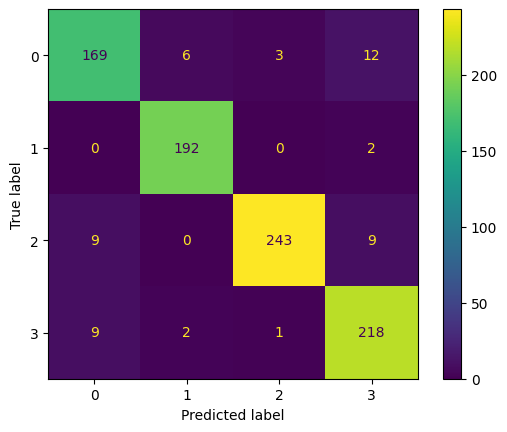

In [ ]:
Dar_prints(y_test_M1,Yprevisto_M1_BOW)

**TF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect_tf = TfidfVectorizer(ngram_range=(1,1), use_idf=False, norm='l1')
vect_tf.fit(df.text)

# transforma o dataframe de teste em vetor (features)
x_train_M1_TF = vect_tf.transform(df_train_M1.texto)
x_test_M1_TF = vect_tf.transform(df_test_M1.texto)

Yprevisto_m1_TF = model(x_train_M1_TF, y_train_M1, x_test_M1_TF, y_test_M1)



              precision    recall  f1-score   support

   brinquedo       0.92      0.91      0.91       190
        game       0.95      0.98      0.97       194
       livro       0.99      0.94      0.96       261
   maquiagem       0.89      0.93      0.91       230

    accuracy                           0.94       875
   macro avg       0.94      0.94      0.94       875
weighted avg       0.94      0.94      0.94       875

0.9394285714285714


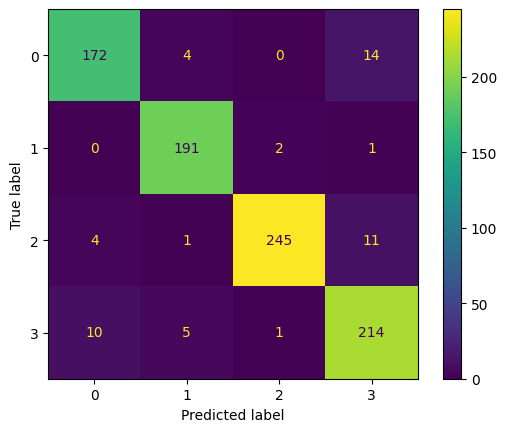

In [ ]:
Dar_prints(y_test_M1,Yprevisto_m1_TF)

**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect_tfIDF = TfidfVectorizer(ngram_range=(1,1), use_idf=True, smooth_idf=False)
vect_tfIDF.fit(df.text)


# transforma o dataframe de teste em vetor (features)
x_train_M1_TFIDF = vect_tfIDF.transform(df_train_M1.texto)
x_test_M1_TFIDF = vect_tfIDF.transform(df_test_M1.texto)

Yprevisto_m1_TFIDF = model(x_train_M1_TFIDF, y_train_M1, x_test_M1_TFIDF, y_test_M1)



              precision    recall  f1-score   support

   brinquedo       0.93      0.88      0.90       190
        game       0.98      0.97      0.97       194
       livro       0.98      0.94      0.96       261
   maquiagem       0.88      0.96      0.92       230

    accuracy                           0.94       875
   macro avg       0.94      0.94      0.94       875
weighted avg       0.94      0.94      0.94       875

0.9394285714285714


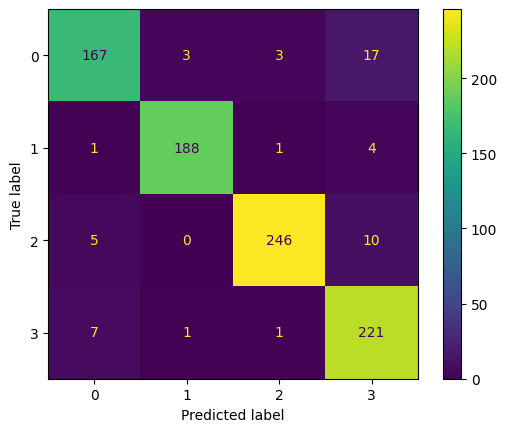

In [ ]:
Dar_prints(y_test_M1,Yprevisto_m1_TFIDF)

Os 3 modelos acabaram teno o mesmo nivel de acuracia, entretetanto. Eles acabaram acertando em aspectos diferentes

## **Parte 2**

In [ ]:
#Avaliação do modelo

# limpeza inicial (normalização)
df.dropna(inplace=True)

df["text"] = df['nome'] + " " + df['descricao']
df['texto'] = df.text.apply(Norma_parte2)
# divisão da amostra entre treino e teste
df_train_M2, df_test_M2 = train_test_split(
      df,
      test_size = 0.3,
      random_state = 42
  )


#####         BOW
#Utilizando contagens de termos (BOW)
vect = CountVectorizer(ngram_range=(1,1))
vect.fit(df_train_M2.texto)

x_train_M2_BOW = vect.transform(df_train_M2.texto)
y_train_M2 = df_train_M2["categoria"]
y_test_M2 = df_test_M2["categoria"]

# transforma o dataframe de teste em vetor (features)
x_test_M2_BOW = vect.transform(df_test_M2.texto)
Yprevisto_M2_BOW = model(x_train_M2_BOW, y_train_M2, x_test_M2_BOW, y_test_M2)


#####         TF


# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect_tf = TfidfVectorizer(ngram_range=(1,1), use_idf=False, norm='l1')
vect_tf.fit(df.text)

# transforma o dataframe de teste em vetor (features)
x_train_M2_TF = vect_tf.transform(df_train_M2.texto)
x_test_M2_TF = vect_tf.transform(df_test_M2.texto)

Yprevisto_m2_TF = model(x_train_M2_TF, y_train_M2, x_test_M2_TF, y_test_M2)


#####         TF_IDF


from sklearn.feature_extraction.text import TfidfVectorizer

# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect_tfIDF = TfidfVectorizer(ngram_range=(1,1), use_idf=True, smooth_idf=False)
vect_tfIDF.fit(df.text)


# transforma o dataframe de teste em vetor (features)
x_train_M2_TFIDF = vect_tfIDF.transform(df_train_M2.texto)
x_test_M2_TFIDF = vect_tfIDF.transform(df_test_M2.texto)

Yprevisto_m2_TFIDF = model(x_train_M2_TFIDF, y_train_M2, x_test_M2_TFIDF, y_test_M2)




              precision    recall  f1-score   support

   brinquedo       0.84      0.94      0.89       190
        game       0.96      0.95      0.96       194
       livro       0.99      0.94      0.96       261
   maquiagem       0.98      0.94      0.96       230

    accuracy                           0.94       875
   macro avg       0.94      0.94      0.94       875
weighted avg       0.95      0.94      0.94       875

0.9428571428571428
              precision    recall  f1-score   support

   brinquedo       0.85      0.95      0.90       190
        game       0.97      0.95      0.96       194
       livro       0.98      0.93      0.96       261
   maquiagem       0.99      0.96      0.97       230

    accuracy                           0.95       875
   macro avg       0.95      0.95      0.95       875
weighted avg       0.95      0.95      0.95       875

0.9474285714285714
              precision    recall  f1-score   support

   brinquedo       0.86      0.97    

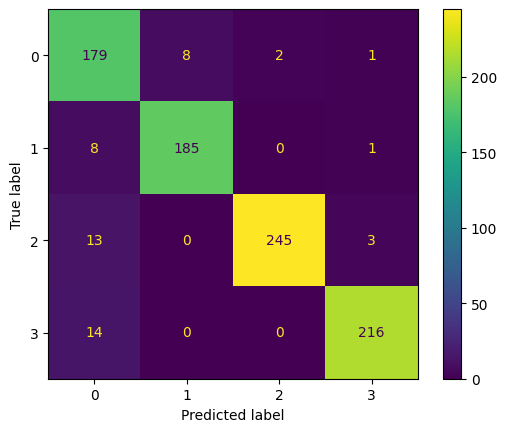

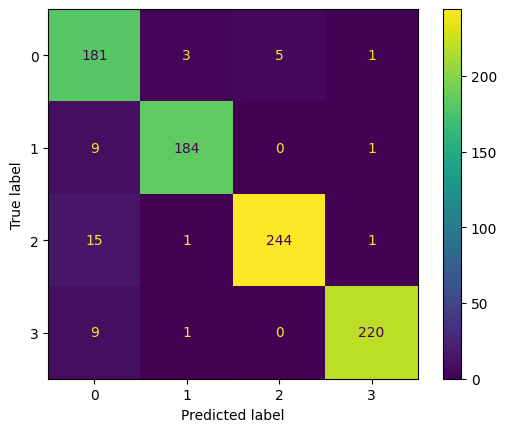

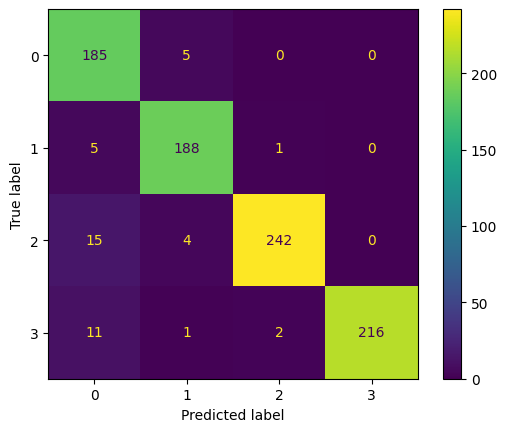

In [ ]:
Dar_prints(y_test_M2,Yprevisto_M2_BOW)
Dar_prints(y_test_M2,Yprevisto_m2_TF)
Dar_prints(y_test_M2,Yprevisto_m2_TFIDF)

Os três continuaram tendo uma acurracia muito proximo, entretando quando foi alterado o modelo, (parte 3) a alteração é bem maior.

## **Parte 3 (Extra)**

Deixei no formato onde é possivel escolher o modelo para rodar depois

In [ ]:
# Modelos de Regressão
from sklearn.linear_model import LogisticRegression

def model(x_train, y_train, x_test, y_test):

  # treinamento do modelo ávore de decisão com o dataframe de treino
  model = LogisticRegression(random_state=42)
  model.fit(x_train, y_train)

  # escoragem da classificação na amostra de teste
  y_pred = model.predict(x_test)

  return y_pred

In [ ]:
# Naive Bayes, bastante utilizado para classificar textos baseado na frequência das palavras independnetemente do contexto (classificação de SPAM)
from sklearn.naive_bayes import MultinomialNB

def model(x_train, y_train, x_test, y_test):

  # treinamento do modelo ávore de decisão com o dataframe de treino
  model = MultinomialNB(random_state=42)
  model.fit(x_train, y_train)

  # escoragem da classificação na amostra de teste
  y_pred = model.predict(x_test)

  return y_pred

In [ ]:
# Random Forest (baseados em Ávores de Decisões)
from sklearn.ensemble import RandomForestClassifier


def model(x_train, y_train, x_test, y_test):

  # treinamento do modelo ávore de decisão com o dataframe de treino
  model = RandomForestClassifier(random_state=42)
  model.fit(x_train, y_train)

  # escoragem da classificação na amostra de teste
  y_pred = model.predict(x_test)

  return y_pred

In [ ]:
#Avaliação do modelo

# limpeza inicial (normalização)
df.dropna(inplace=True)

df["text"] = df['nome'] + " " + df['descricao']
df['texto'] = df.text.apply(Norma_parte2)
# divisão da amostra entre treino e teste
df_train_M2, df_test_M2 = train_test_split(
      df,
      test_size = 0.3,
      random_state = 42
  )


#####         BOW
#Utilizando contagens de termos (BOW)
vect = CountVectorizer(ngram_range=(1,1))
vect.fit(df_train_M2.texto)

x_train_M2_BOW = vect.transform(df_train_M2.texto)
y_train_M2 = df_train_M2["categoria"]
y_test_M2 = df_test_M2["categoria"]

# transforma o dataframe de teste em vetor (features)
x_test_M2_BOW = vect.transform(df_test_M2.texto)
Yprevisto_M2_BOW = model(x_train_M2_BOW, y_train_M2, x_test_M2_BOW, y_test_M2)


#####         TF


# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect_tf = TfidfVectorizer(ngram_range=(1,1), use_idf=False, norm='l1')
vect_tf.fit(df.text)

# transforma o dataframe de teste em vetor (features)
x_train_M2_TF = vect_tf.transform(df_train_M2.texto)
x_test_M2_TF = vect_tf.transform(df_test_M2.texto)

Yprevisto_m2_TF = model(x_train_M2_TF, y_train_M2, x_test_M2_TF, y_test_M2)


#####         TF_IDF


from sklearn.feature_extraction.text import TfidfVectorizer

# ao usar o TfidfVectorizer() o default ngram_range=unigrama, use_idf=True, norm='l2', lowercase=True, max_df e min_df=1, smooth_idf=True, sublinear_tf=False
vect_tfIDF = TfidfVectorizer(ngram_range=(1,1), use_idf=True, smooth_idf=False)
vect_tfIDF.fit(df.text)


# transforma o dataframe de teste em vetor (features)
x_train_M2_TFIDF = vect_tfIDF.transform(df_train_M2.texto)
x_test_M2_TFIDF = vect_tfIDF.transform(df_test_M2.texto)

Yprevisto_m2_TFIDF = model(x_train_M2_TFIDF, y_train_M2, x_test_M2_TFIDF, y_test_M2)




              precision    recall  f1-score   support

   brinquedo       0.96      1.00      0.98       190
        game       1.00      0.97      0.99       194
       livro       1.00      0.98      0.99       261
   maquiagem       0.99      1.00      0.99       230

    accuracy                           0.99       875
   macro avg       0.99      0.99      0.99       875
weighted avg       0.99      0.99      0.99       875

0.9874285714285714
              precision    recall  f1-score   support

   brinquedo       0.97      0.74      0.84       190
        game       0.96      0.69      0.80       194
       livro       0.72      1.00      0.84       261
   maquiagem       0.97      0.97      0.97       230

    accuracy                           0.87       875
   macro avg       0.91      0.85      0.86       875
weighted avg       0.89      0.87      0.86       875

0.8651428571428571
              precision    recall  f1-score   support

   brinquedo       0.96      0.97    

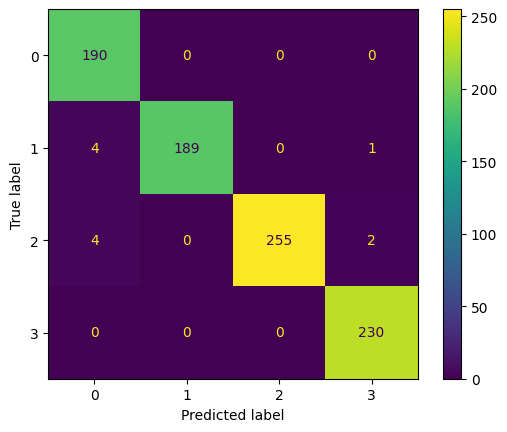

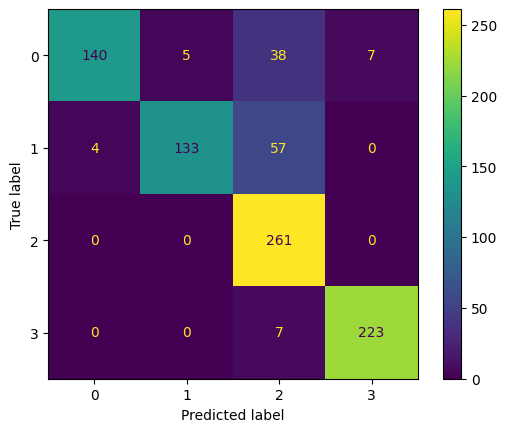

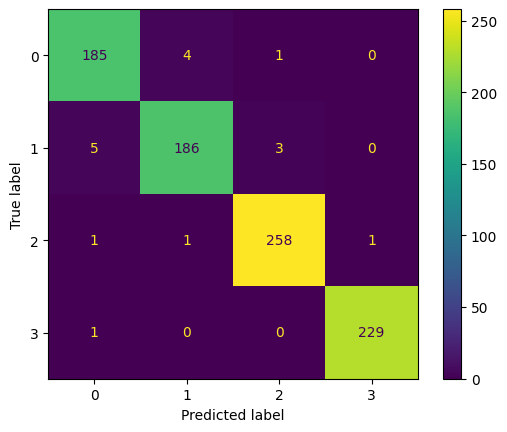

In [ ]:
Dar_prints(y_test_M2,Yprevisto_M2_BOW)
Dar_prints(y_test_M2,Yprevisto_m2_TF)
Dar_prints(y_test_M2,Yprevisto_m2_TFIDF)

Em logistic regression o acertividade usando TF foi bem baixa

Com Random Forest a acertividade foi bem alta em todos